In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# CHAPTER 2: 지도 학습
---
지도 학습에 관해 더 자세히 살펴보고 인기 있는 지도 학습 알고리즘 몇 가지를 알아보자.   
**목표: 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측**

### 2.1 분류(classification)와 회귀(regression)
* 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측
    * 이진 분류(binary classification)와 다중 분류(multiclass classification)
        * 이진 분류에서 한 클래스를 양성(positive) 클래스, 다른 하나를 음성(negative) 클래스라고 한다.
            * 양성 클래스는 학습하고자 하는 대상 (스팸메일 분류기의 경우 양성은 스팸 클래스)
* 회귀: 실수(부동소수점수) 예측
    * Ex) 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득 예측

### 2.2 일반화, 과대적합, 과소적합
* 일반화(generalization): 모델이 처음 보는 데이터에 대해 정확하게 예측하는 경우
* 과대적합(overfitting): 가진 정보를 모두 사용해서 너무 복잡한 모델을 만들 경우 (새로운 데이터에 일반화 되기 어려울 때)
* 과소적합(underfitting): 과대적합의 반대의 경우

### 2.3 지도 학습 알고리즘
#### 2.3.1분류를 위한 예시 데이터 셋

X.shape:  (26, 2)


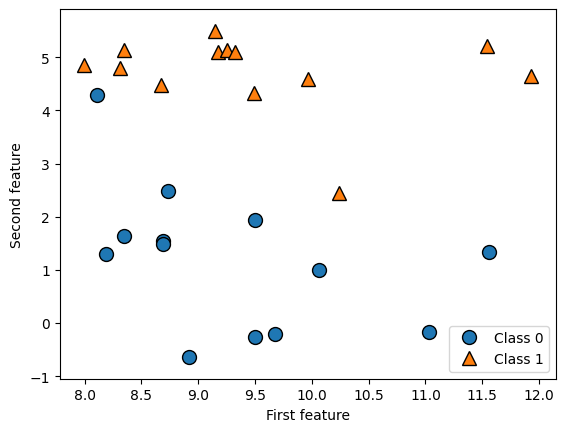

In [2]:
# 예제 데이터셋의 산점도 생성
# 데이터셋 생성 (forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋)
X, y = mglearn.datasets.make_forge()

# 산점도 생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: ", X.shape)
# (26, 2) 데이터 셋을 이차원 좌표에 뿌리고 타깃값이 담긴 y에 따라 class 0, 1을 서로 다른 모양으로 표시

Text(0, 0.5, 'Target')

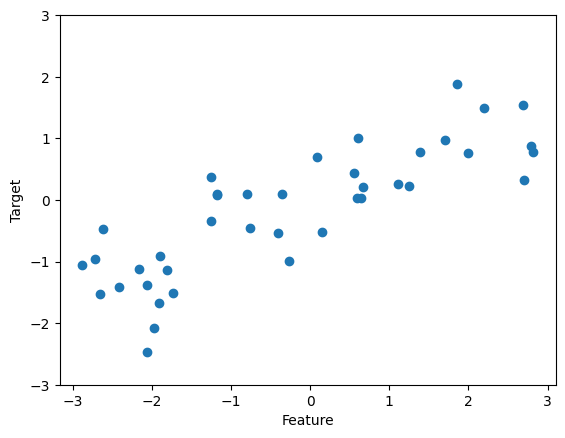

In [3]:
# 회귀 예제를 위한 예제(인공) 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

* 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터
    * 각 종양은 양성과 악성으로 레이블
    * 조직 데이터를 기반으로 종양이 악성인지를 예측

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): ", cancer.keys())

cancer.keys():  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태: ", cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


In [6]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**회귀를 위한 예시 데이터 셋**
* 보스턴 주택가격 데이터셋
* 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격 예측
* 책의 예시로 나온 보스턴 주택가격 데이터셋은 윤리 문제로 scikit-learn 1.2 버전 이후로 삭제 됨.
* 대신 교육용을 위한 데이터 셋이 남아있으니 다음 코드를 통해서 해당 데이터셋을 가져올 수 있다.
* 하지만 책의 저자가 만든 mglearn 패키지에는 남아있으므로 그것을 사용하면 된다.

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [9]:
print("데이터의 형태: ", boston.shape)

데이터의 형태:  (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()  # 특성 공학
print("X.shpae: ", X.shape)

X.shpae:  (506, 104)


#### 2.3.2 K-최근접 이웃

**K-최근접 이웃 분류**

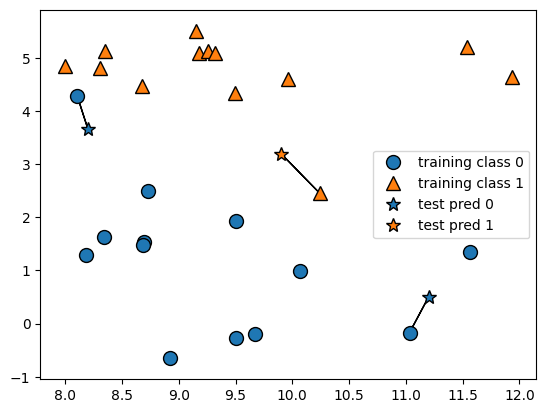

In [11]:
# 1-최근접 이웃 분류 예시
mglearn.plots.plot_knn_classification(n_neighbors=1)

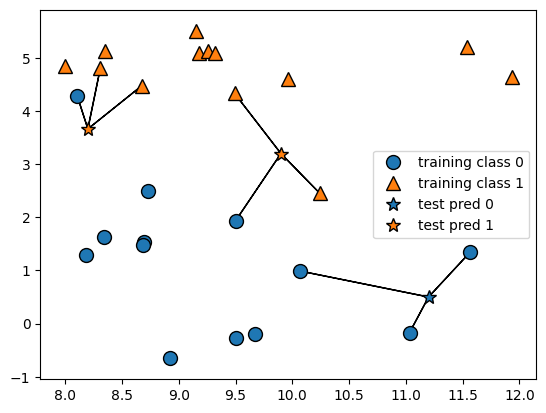

In [12]:
# 3-최근접 이웃 분류 예시
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
# K-최근접 이웃 알고리즘 적용
# 훈련 세트와 테스트 세트 나눔
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# K-NN 객체 생성
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
# 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("테스트 세트 예측: ", clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [17]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


**KNeighborsClassifier 분석**

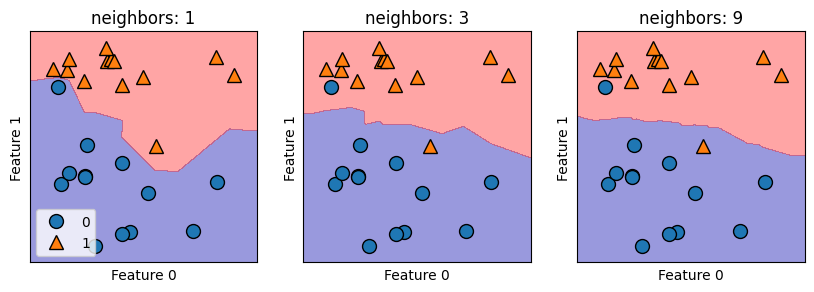

In [18]:
# 이웃이 하나, 셋, 아홉 개일 때의 결정 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 반대로 많이 사용하면 복잡도는 낮아진다.

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\supli\App

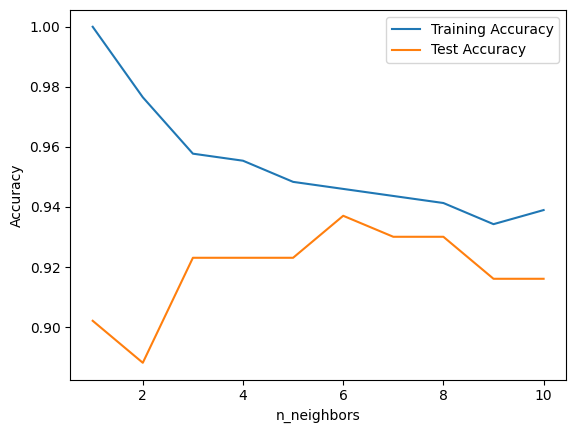

In [19]:
# 모델의 복잡도와 일반화 사이의 관계
# 실제 데이터를 사용
# 훈련 세트와 테스트 세트로 나눈 뒤 성능 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10 까지 n_neighbos 적용
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    # 훈련 세트의 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

위 그림을 통해 이웃이 적을 때는 과대적합되어 훈련 정확도는 완벽하지만 테스트 정확도는 오히려 낮은 것을 알 수 있다.   
하지만 반대로 이웃이 10일 경우는 과소적합되는 것을 알 수 있다.   
**위 그림을 바탕으로 이웃이 6일 때 일반화가 가장 잘 된다는 것을 알 수 있다.**

**K-최근접 이웃 회귀**

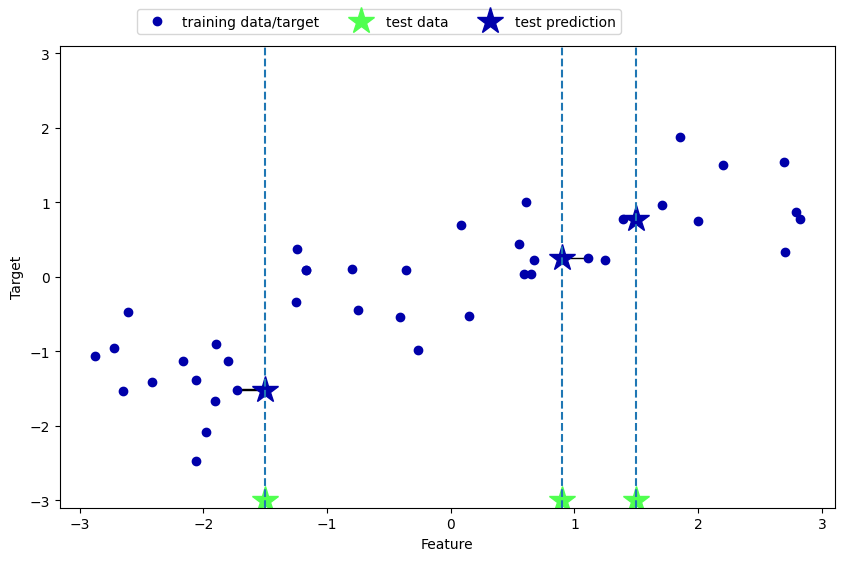

In [20]:
# wave 데이터셋에 대한 1-최근접 이웃 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

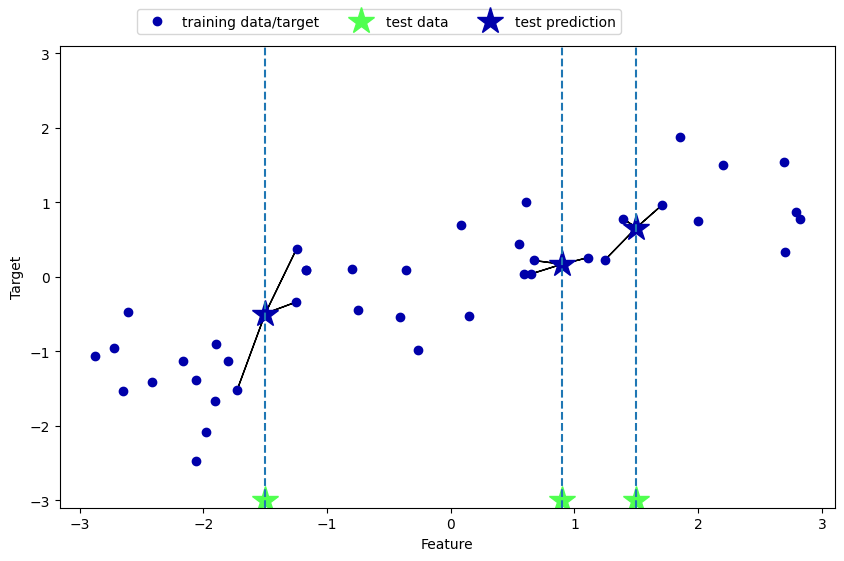

In [21]:
# 3-최근접 이웃일 때
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체 생성(n_neighbors=3)
reg = KNeighborsRegressor(n_neighbors=3)

# 모델 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


회귀에서 score 메서드는 결정계수라고 불리는 $R^2$ 값을 반환한다.   
보통 0과 1사이의 값을 출력하며 1에 가까울수록 예측이 잘 되었다고 볼 수 있다.   
$R^2 = 1 - \frac {\sum (target - predict())^2} {\sum (target - mean(target))^2}$

In [24]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


In [25]:
numerator = 0
denominator = 0
for target , predict in zip(y_test, reg.predict(X_test)):
    numerator += ((target - predict) ** 2)
    denominator += ((target - np.mean(y_test)) ** 2)

print("직접 계산한 R^2: {:.2f}".format(1 - (numerator/denominator)))

직접 계산한 R^2: 0.83


KNeighborsRegressor 분석

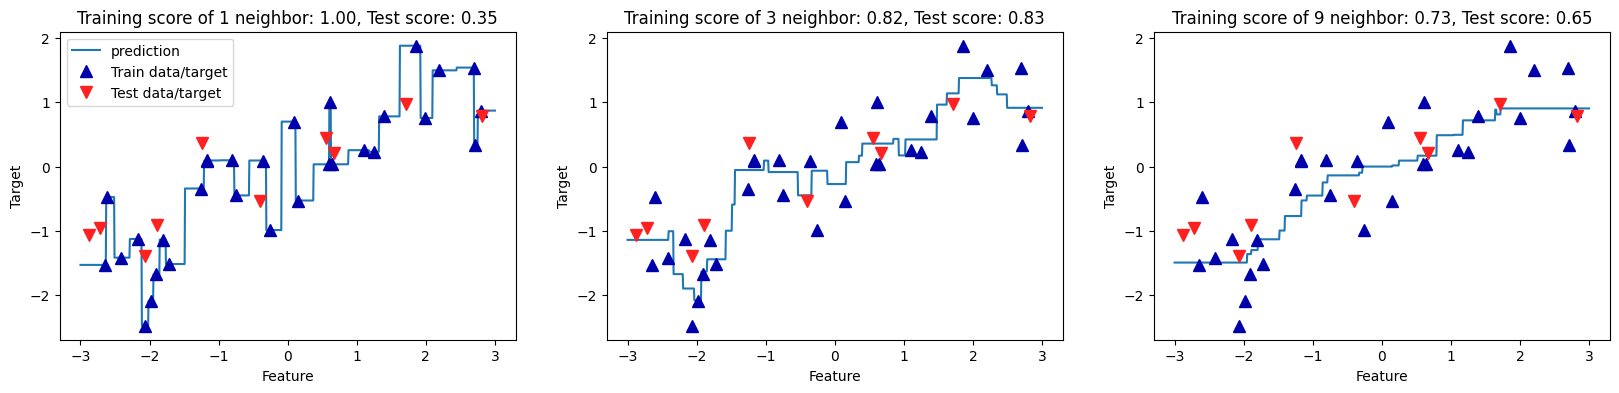

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "Training score of {} neighbor: {:.2f}, Test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["prediction", "Train data/target", "Test data/target"])

**KNN 정리**
* 장점: 이해하기 매우 쉬운 모델
* 단점: 훈련 세트가 매우크면 예측이 느려짐(예측 값 계산할 때 n개의 점과의 거리를 일일이 계산해야 하기 때문)
    * 특성이 많으면(수백 개 이상) 잘 작동하지 않음.
    * 특성 값이 대부분 0인 데이터 셋과도 잘 작동하지 않음.   
    
**-> 이해하기 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족하여 현업에서 잘 쓰이지 않음.**

#### 2.3.3 선형 모델(linear model)

* KNN의 단점을 보완
* 입력 특성에 대한 선형 함수를 만들어 예측을 수행


**회귀의 선형 모델**

$\widehat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b $

w[0]: 0.393906  b: -0.031804


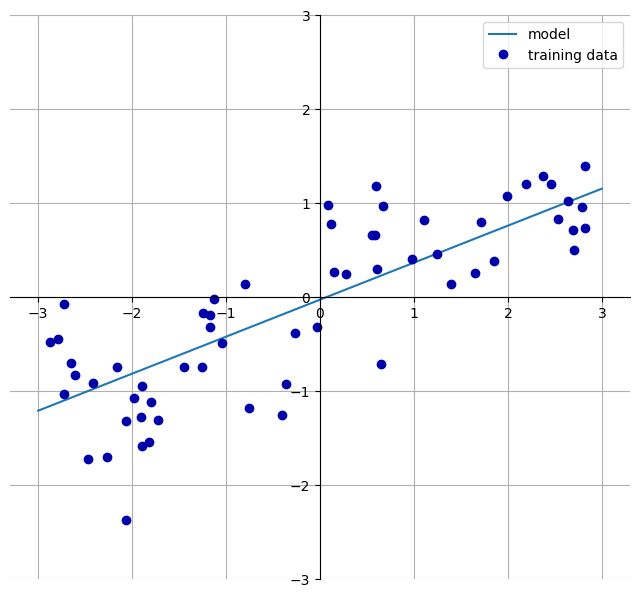

In [27]:
mglearn.plots.plot_linear_regression_wave()

직선을 사용하여 예측했기 때문에 예측이 데이터의 상세 정보를 모두 잃어버린 것처럼 보이지만   
특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다,

**선형 회귀(최소 제곱법)**

: 예측과 훈련 세트에 있는 타깃 y 사이의 ```평균제곱오차```를 최소화하는 파라미터 $w$와 $b$를 찾음.   

* 평균제곱오차 공식:   
$MSE = \frac {1} {n} \sum_{i=1}^{n} (y_i - \widehat y_i)^2$

In [28]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_: ", lr.coef_)   # 가중치 또는 계수
print("lr.intercept_: ", lr.intercept_) # 편향 또는 절편

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# R^2 값이 그리 좋은 것은 아니지만 훈련 세트와 테스트 점수가 매우 비슷하므로 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [31]:
# 보스턴 주택 가격 데이터셋
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# 특성이 많아 훈련 세트에서는 점수가 높지만 테스트 세트에서는 점수가 낮은 것을 알 수 있음: 과대 적합 -> 복잡도 제어

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


**릿지 회귀**

: 가중치(w)의 절댓값을 최대한 작게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만듦. -> L2 규제   
    사용자가 지정하는 매개변수의 값으로 복잡도를 조절할 수 있다. (선형회귀와의 차이)

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
# 훈련 세트 점수는 낮아졌지만 테스트 세트에 대한 점수는 높아진 것을 알 수 있음. -> 일반화가 더 잘 됨.

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [34]:
# alpha 값이 높아질수록 가중치를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줌.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


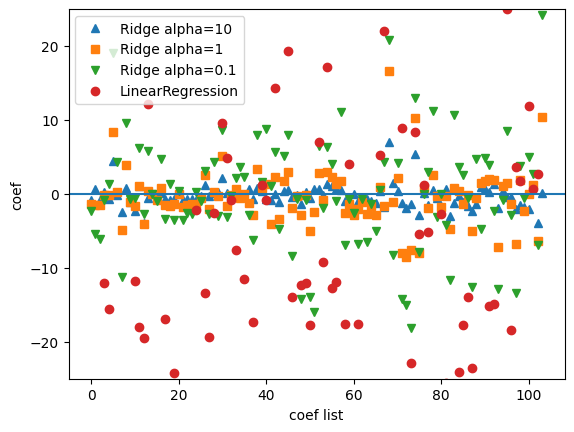

In [36]:
# alpha 값에 따른 모델의 coef_속성 변화
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("coef list")
plt.ylabel("coef")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()
# alpha값이 클수록 계수 값이 0에 가까운 것을 알 수 있다.

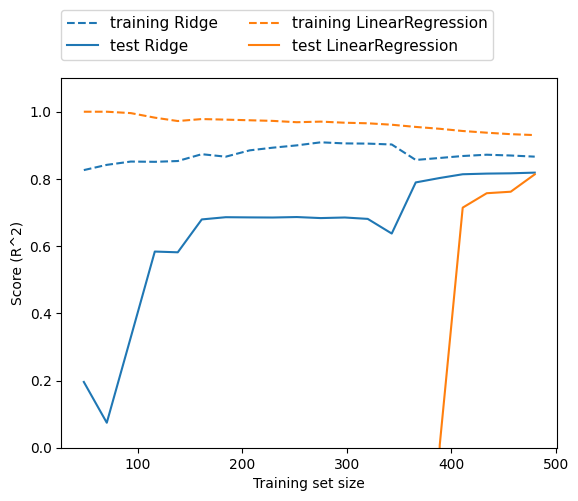

In [37]:
# 보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형회귀의 학습 곡선
mglearn.plots.plot_ridge_n_samples()
# 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것

**라소**

: 선형 회귀에 적용하는 또 다른 규제로 L1 규제로 불린다.   
L2 규제와 마찬가지로 계수를 0에 가깝게 만드는 것이 목표이고, 어떤 계수는 실제로 0이 되기도 한다.

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))
# 104개 특성 중 4개만 사용하였으므로 훈련 세트와 테스트 세트에서 모두 점수가 좋지 않음 -> 과소 적합

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수:  4


In [39]:
# alpha 값 조정
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수:  33


In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:  96


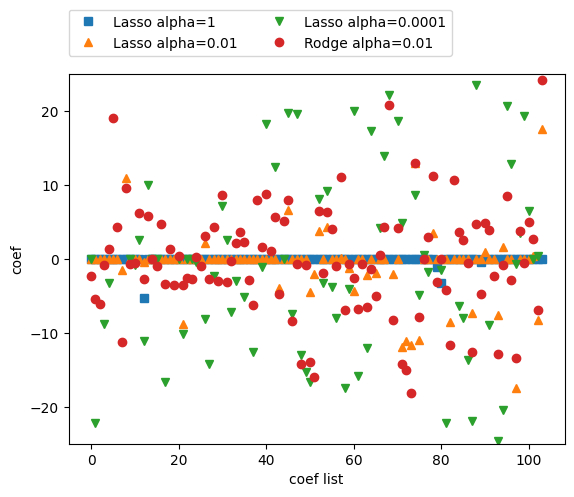

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Rodge alpha=0.01")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list")
plt.ylabel("coef")
plt.show()

* 보통은 릿지 모델을 더 선호
* 하지만 특성이 많고 그 중 일부부만 중요하다면 라쏘가 더 좋은 선택이 될 수 있음
* 라쏘와 릿지를 결합한 ElasticNet도 scikit-learn에서 제공

**분류용 선형 모델** 

이진 분류 선형모델 방정식: $\hat y = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b > 0 $   
=> 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기   

널리 알려진 선형 분류 알고리즘
* 로지스틱 회귀(Logistic regression)
* 서포트 벡터 머신(Support vector machine)

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


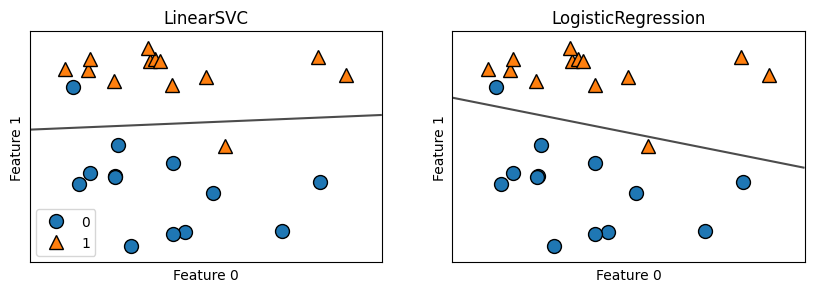

In [42]:
# forge 데이터셋을 사용하여 LogistcRegression과 LinearSVC 모델형성, 이 모델들의 결정 경계
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)   # 결정 경계(직선)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    # 데이터 찍기
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.   
그러므로 C값이 높아지면 규제가 감소하여 훈련세트에 더 잘 맞게 되고 C값이 낮아질수록 가중치(w)의 값이 0에 가까워진다.

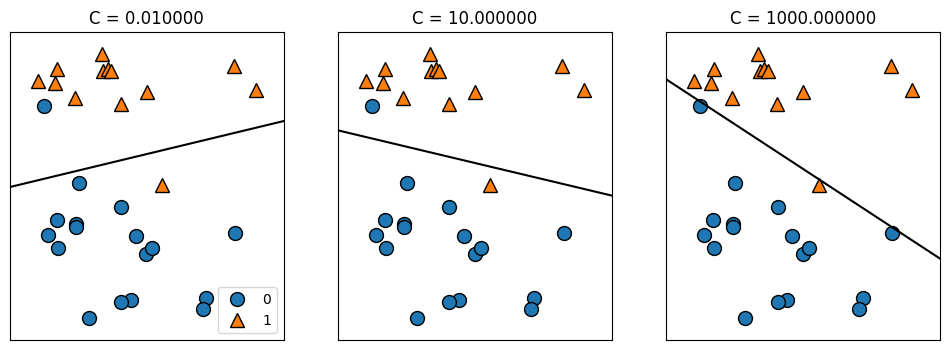

In [43]:
# C 값에 따른 결정 경계
mglearn.plots.plot_linear_svc_regularization()

위와 같이 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이기 때문에 매우 제한적인 것처럼 보인다.   
하지만 고차원의 경우 분류에 대한 선형 모델은 매우 강력해지며 오히려 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요하다.

In [44]:
# 유방암 데이터셋을 사용한 LogisticRegression 분석
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
# 훈련 세트와 테스트 세트 점수가 매우 비슷하므로 과소 적합

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [45]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
# C값이 클수록 (복잡도가 높은 모델일수록) 성능이 좋다.

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [46]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


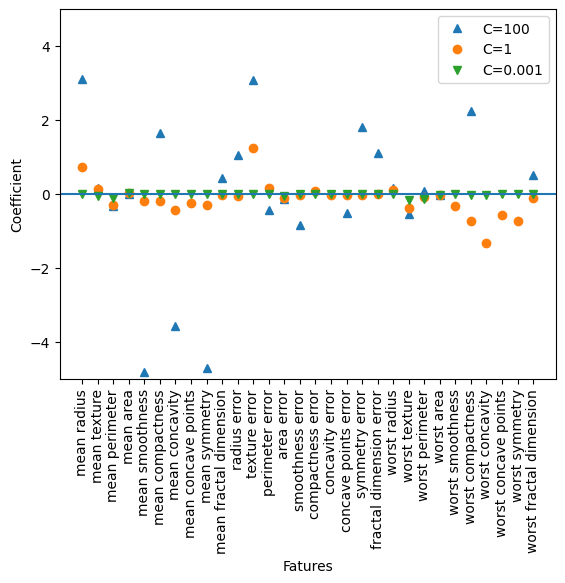

In [47]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Fatures")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

C=0.001인 L1 로지스틱 회귀의 훈련 정확도: 0.913146
C=0.001인 L1 로지스틱 회귀의 테스트 정확도: 0.923077

C=1.000인 L1 로지스틱 회귀의 훈련 정확도: 0.960094
C=1.000인 L1 로지스틱 회귀의 테스트 정확도: 0.958042

C=100.000인 L1 로지스틱 회귀의 훈련 정확도: 0.985915
C=100.000인 L1 로지스틱 회귀의 테스트 정확도: 0.979021



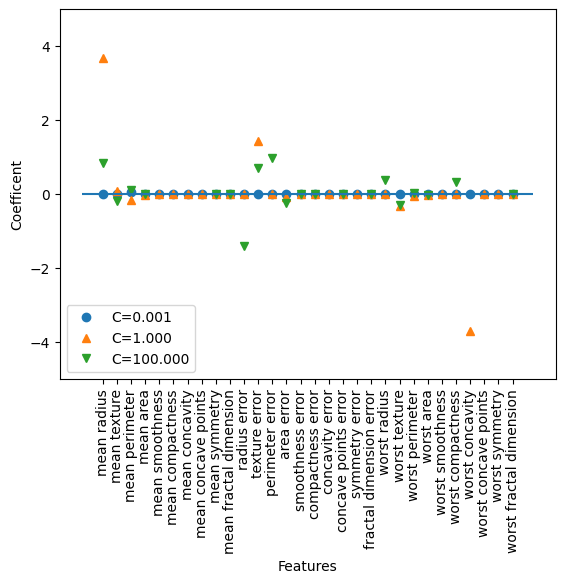

In [48]:
# L1 규제 사용(LogisticRegression은 기본적으로 L2규제 사용)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    
    print("C={:.3f}인 L1 로지스틱 회귀의 훈련 정확도: {:2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 L1 로지스틱 회귀의 테스트 정확도: {:2f}".format(C, lr_l1.score(X_test, y_test)))
    print()
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlabel("Features")
plt.ylabel("Coefficent")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

**다중 클래스 분류용 선형 모델**   

대부분의(로지스틱 회귀 제외) 다중 클래스 분류 알고리즘: 일대다 방법 (각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습 

=> 클래스 수만큼 이진 분류 모델 생성)

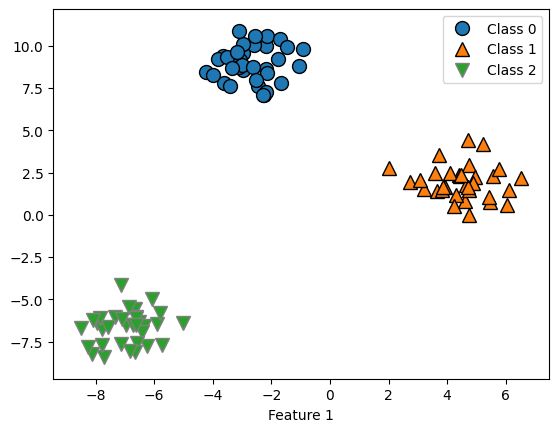

In [49]:
# 세 개의 클래스를 가진 2차원 데이터셋
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)  # default, ceters=3 (클래스 수)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.xlabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [50]:
# LinearSVC 분류기 훈련
linear_svm = LinearSVC().fit(X, y)

print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


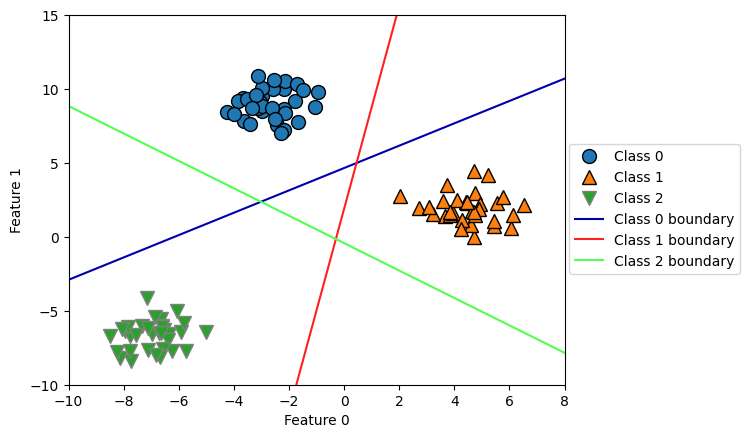

In [51]:
# 경계 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)    # 결정 경계 공식

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 boundary", "Class 1 boundary", "Class 2 boundary"], loc=(1.01, 0.3))
plt.show()

```Class 0```의 포인터들은 ```Class 0```을 구분하는 이진 분류기, ```Class 1```을 구분하는 이진 분류기, ```Class 2```를 구분하는 이진 분류기에 의해 ```Class 0```으로 분류된다.

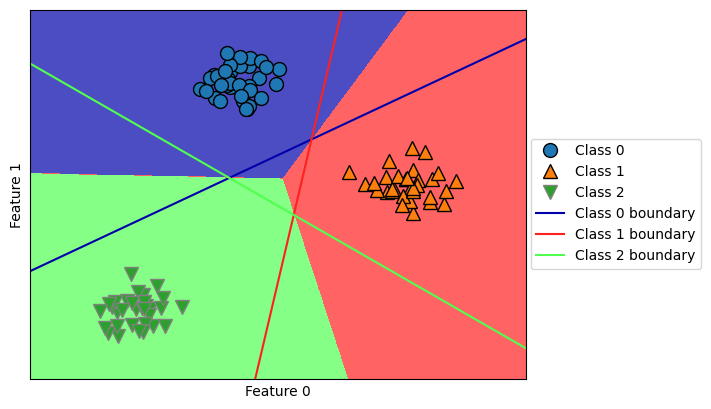

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 boundary", "Class 1 boundary", "Class 2 boundary"], loc=(1.01, 0.3))
plt.show()

반면 위 그래프 중앙의 삼각형 영역의 경우, 세 분류기가 모두 나머지로 분류했기에 분류 공식의 결과가 가장 높은 클래스로 분류된다.

**장단점과 매개변수**

* 회귀에서는 alpha 값이 클수록, 분류에서는 C 값이 작을수록 모델이 단순해진다.   
* 중요한 특성이 많지 않다면 L1 규제를, 그렇지 않다면 기본적으로 L2 규제를 사용하면 된다.
* 선형 모델은 학습 속도가 빠르고 예측 또한 빠르다.
* 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다.
* 샘플에 비해 특성이 많을 때 잘 작동한다.


#### 2.3.4 나이브 베이즈 분류기   
: 선형 모델과 유사, 선형 분류기보다 훈련 속도는 빠르지만 일반화 성능은 조금 뒤지는 편 (각 특성을 개별로 취급하기 때문)
* GaussianNB: 연속적인 데이터
* BernouliNB: 이진 데이터
* MulinomialNB: 정수 카운트 데이터


In [53]:
# BernouliNB 분류기 작동 예
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):  
    counts[label] = X[y == label].sum(axis=0)   # y == label 인 마스크 배열을 생성, True 마스크인 배열의 세로(행) 합을 구한다.
    
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


**장단점과 매개변수**   
* 복잡도를 조절하는 ```alpha``` 매개변수: 클수록 모델의 복잡도는 낮아짐.
* 선형 모델과 장단점 비슷

#### 2.3.5 결정 트리   
: 스무고개와 같이 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습

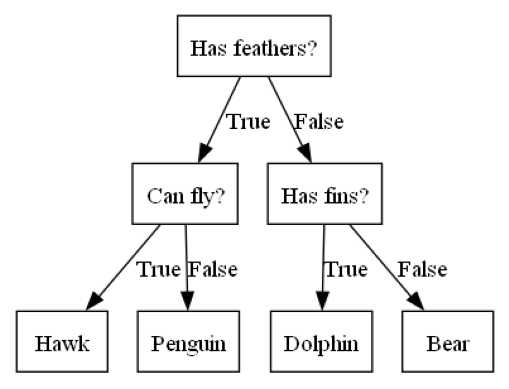

In [54]:
mglearn.plots.plot_animal_tree()

**결정트리 만들기**

결정트리를 학습한다: 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다.   
&emsp; 이런 질문들을 **테스트**라고 한다.

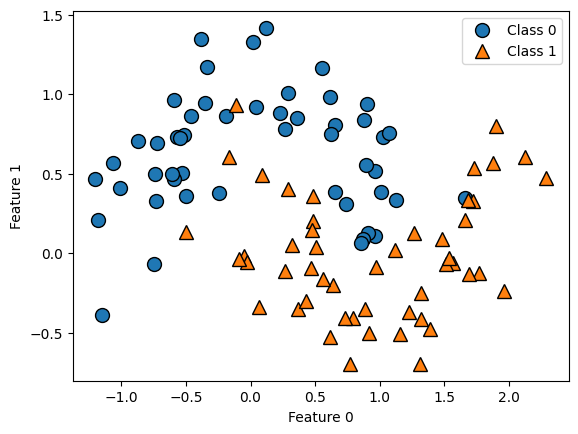

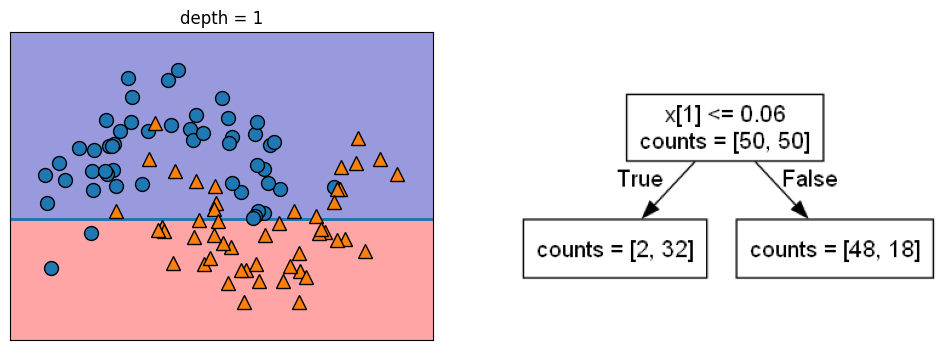

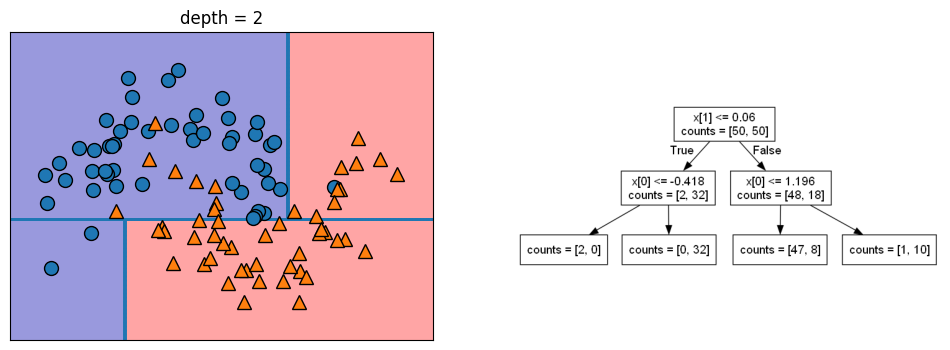

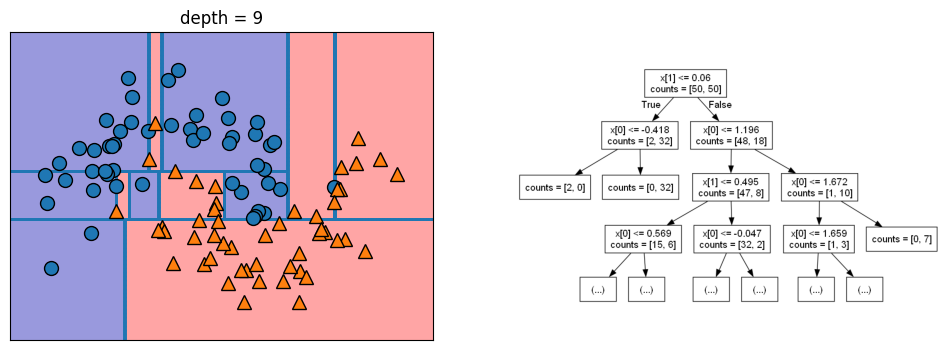

In [55]:
# 결정트리 작동방식
mglearn.plots.plot_tree_progressive()

새로운 데이터에 대한 예측(분류)의 경우 주어진 데이터 포인트 특성이 분할한 영역 중 어디에 놓였는가에 따라 분류 된다.   
회귀의 경우 테스트를 따라 트리를 탐색하여 리프 노드에 도착하면 리프 노드의 훈련 데이터 평균값이 회귀값이 된다.

**결정 트리의 복잡도 제어하기**   
일반적으로 모든 리프 노드가 순수노드가 될 때까지 훈련을 진행하면 모델이 매우 복잡해진다. -> 과대적합   

과대 적합을 어떻게 막나?
* 사전 가지치기: 트리 생성을 일찍 중단(트리의 최대 깊이나 리프노드의 개수를 제한)
* 가지치기: 트리를 만든 후 데이터 포인트가 적은 노드를 삭제 혹은 병합

In [56]:
# 유방암 데이터셋을 이용해 사전 가치지기 효과 확인
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)  # 사전 가지치기 X
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# 훈련 데이터에 과대적합된 것을 알 수 있다.

print()
# 트리의 최대 깊이 정하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


**결정 트리 분석**

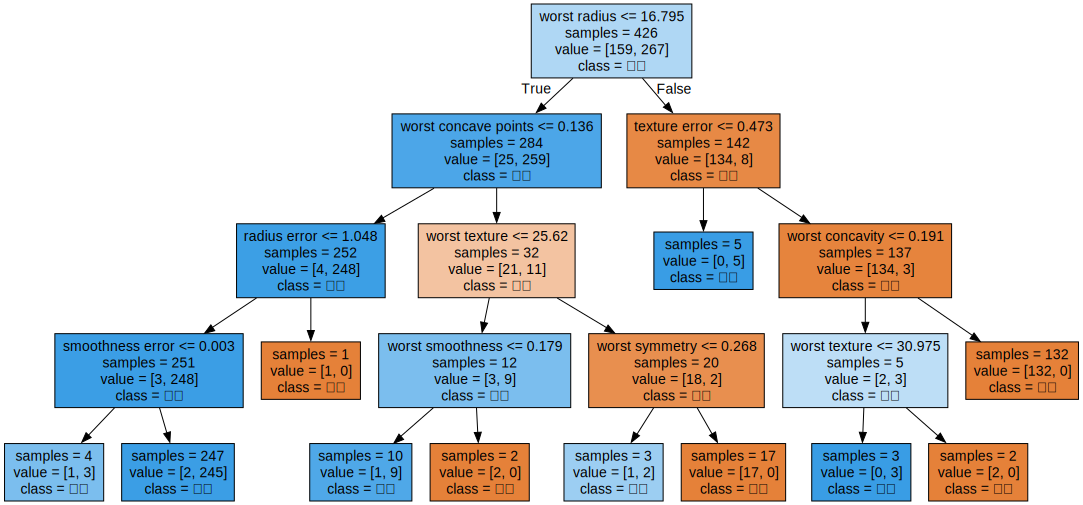

In [57]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="Ch2_tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

with open("Ch2_tree.dot", "rt", encoding="utf-8") as f:
    dot_grah = f.read()
display(graphviz.Source(dot_grah))

**트리의 특성 중요도**   
: 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 척도(0 ~ 1 사잇값)

In [58]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


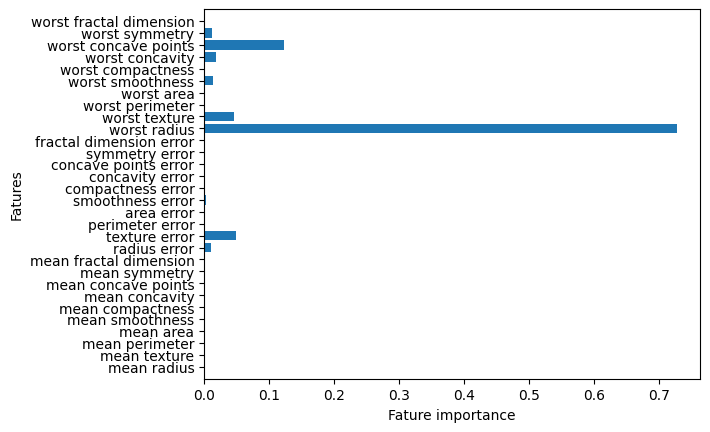

In [59]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Fature importance")
    plt.ylabel("Fatures")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

* 가장 중요한 특성이 루트노드에서 사용되었다.
* ```feature_importance_```가 낮다고 해서 유용하지 않은 특성은 아님.

Feature importances: [0. 1.]


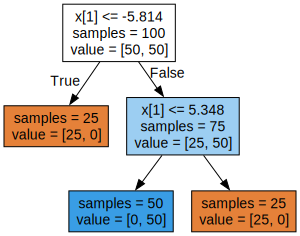

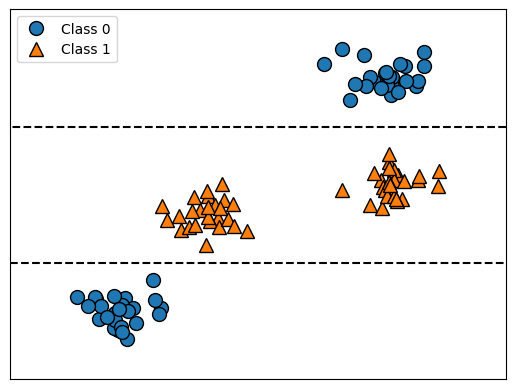

In [60]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

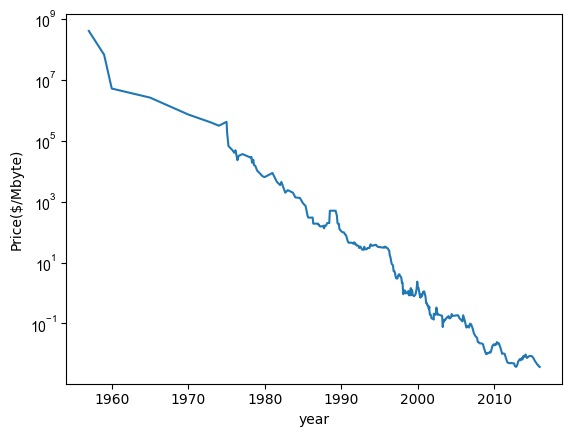

In [61]:
# 결정 트리 회귀는 외삽 데이터에 대해 예측하지 못한다.
# 컴퓨터 메모리 가격 동향 데이터셋
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("Price($/Mbyte)")
plt.show()

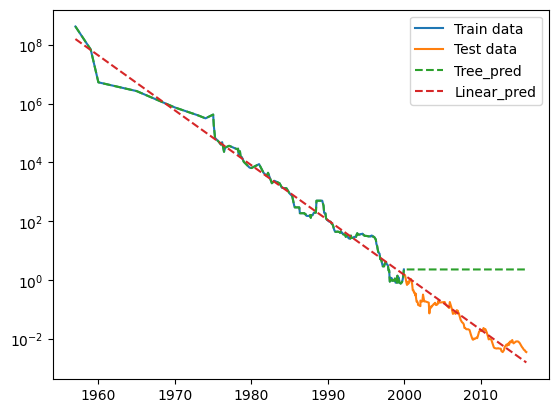

In [62]:
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만 사용
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 하기 위해 로그 스케일로 변환
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)    # 결정 트리 회귀
linear_reg = LinearRegression().fit(X_train, y_train)   # 선형 회귀

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값을 로그 스케일에서 원래 스케일로 변환
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# 그래프 그리기
plt.semilogy(data_train.date, data_train.price, label="Train data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, linestyle="--", label="Tree_pred")
plt.semilogy(ram_prices.date, price_lr, linestyle="--", label="Linear_pred")
plt.legend()
plt.show()

결정 트리 회귀는 선형 회귀와는 다르게 훈련 데이터에 대해서는 완벽히 예측하지만 테스트 데이터는 외삽이므로 마지막 데이터 포인트를 이용해 예측한다.

**장단점과 매개변수**

* 사전 가지치기 매개변수: ```max_depth```, ```max_leaf_nodes```, ```min_samples_leaf```
* 만들어진 모델을 쉽게 시각화할 수 있다.
* 데이터의 스케일에 구애받지 않는다.(정규화 같은 전처리 X)
* 사전 가지치기를 해도 과대적합되는 경향이 있음 -> 일반화 성능이 떨어짐. -> **앙상블**

#### 2.3.6 결정 트리 앙상블   
앙상블(ensemble): 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

대표적인 앙상블 모델
* 랜덤 포레트스(random forest)
* 그레이디언트 부스팅(gradient boosting)

**랜덤 포레스트**   
:결정 트리의 단점인 훈련 데이터에 과대적합을 회피   
&emsp; 서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균냄으로써 과대적합된 양을 줄이는 방식

**랜덤 포레스트 구축**

* 부투스트랩 샘플 생성: 독립된 각 트리마다 데이터 포인트 중 일부를 무작위로 추출 (중복 추출 가능, 서로 다른 방향으로 과대적합하기 위함)
* 특성 또한 후보 특성을 일부 골라 그 중 최선의 테스트를 선택   
=> 모든 트리가 서로 달라지도록 생성됨   

* 회귀의 경우 모든 트리의 예측들의 평균을 최종 예측
* 분류의 경우 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값

**랜덤 포레스트 분석**



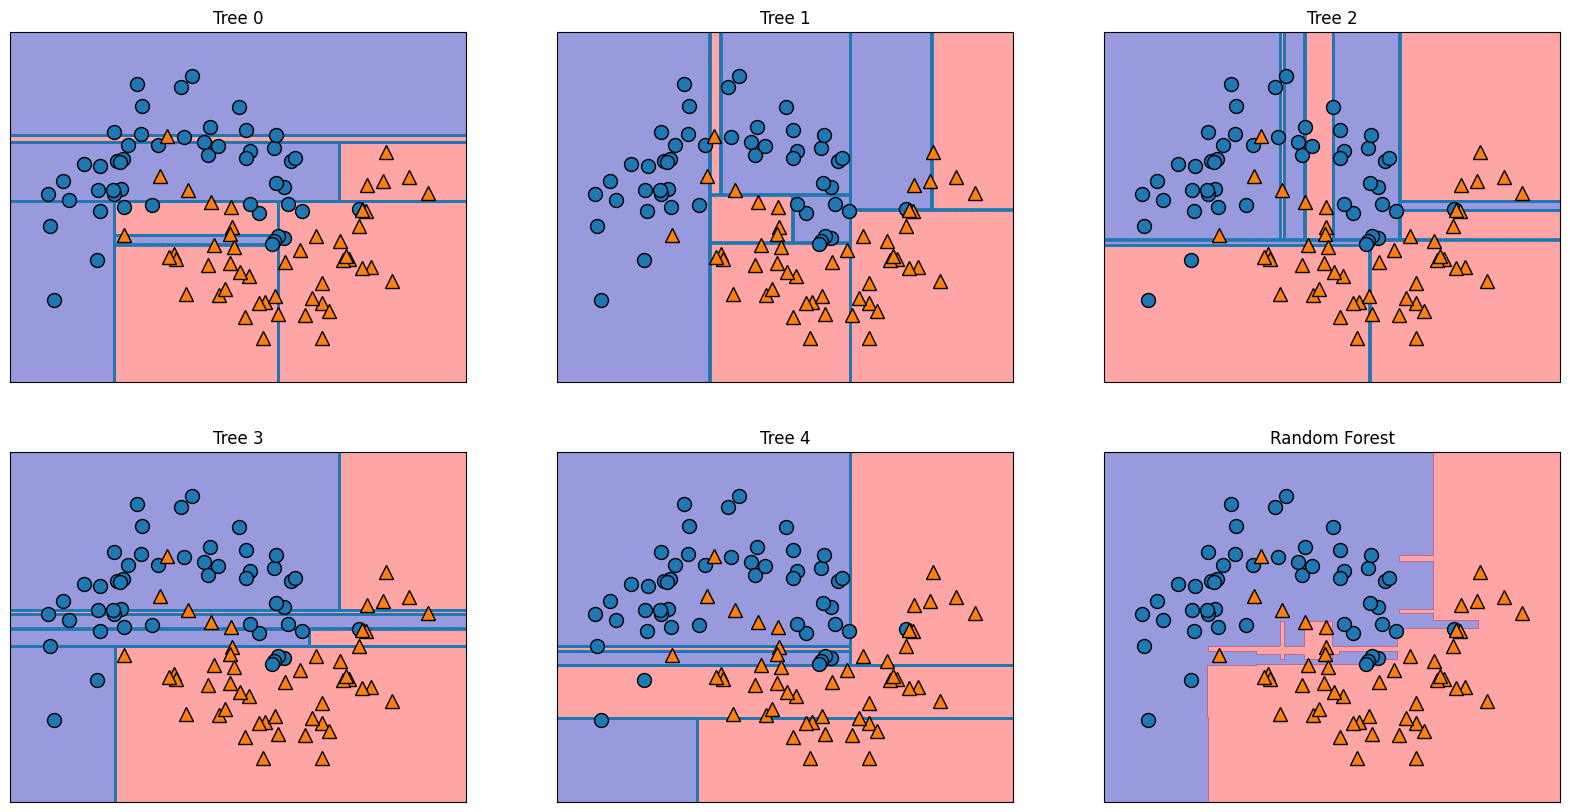

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # n_estimators: 결정 트리 개수(각 트리마다 데이터 포인트 , 특성이 다름)
forest.fit(X_train, y_train)

# 각 트리에서 학습된 결정 경계, 최종 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [64]:
# 유방암 데이터셋에 100개의 트리로 이루어진 랜덤 포레스트를 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 기본 설정으로도 좋은 결과를 생성

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


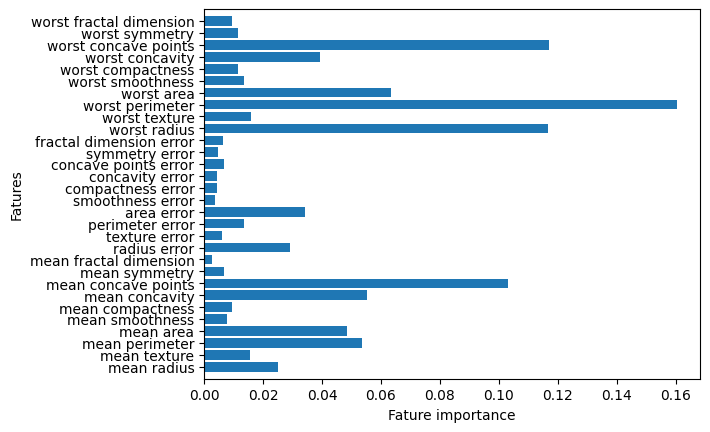

In [65]:
# 랜덤 포레스트 특성 중요도(개별 결정 트리보다 특성 중요도 신뢰도가 더 뛰어남)
plot_feature_importances_cancer(forest)

**장단점과 매개변수**

* 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음 -> 널리 사용
* 결정 트리의 단점을 보완
* ```n_jobs``` 를 통해 상요할 CPU 코어 수 지정
* 텍스트 데이터와 같이 매우 차원이 높고 회소한 데이터에는 잘 작동하지 않음 (선형모델이 더 적절)
* 선형모델보다 많은 메모리를 사용하며 훈련과 예측이 느림
* 사전 가지치기 옵션: ```n_estimators```, ```max_features```, ```max_depth```

**그레이디언트 부스팅 회귀 트리**

: 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법   
&emsp; 이름은 회귀이지만 회귀와 분류 모두 사용 가능

* 랜덤 포레스트와 달리 무작위성이 아닌 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성
    * 이전에 만든 트리의 예측과 타깃 값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가
* 대신 강력한 사전 가지치기 사용 -> 메모리 사용도 적고 예측도 빠름
* ```learning_rate```: 이전 트리의 오차를 얼마나 강하게 보정할 것이지를 제어하는 매개변수

In [66]:
# 유방암 데이터셋을 이용한 GradientBoostingClassfier 사용 예
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
# 과대적합이 어느정도 있다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

print()
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


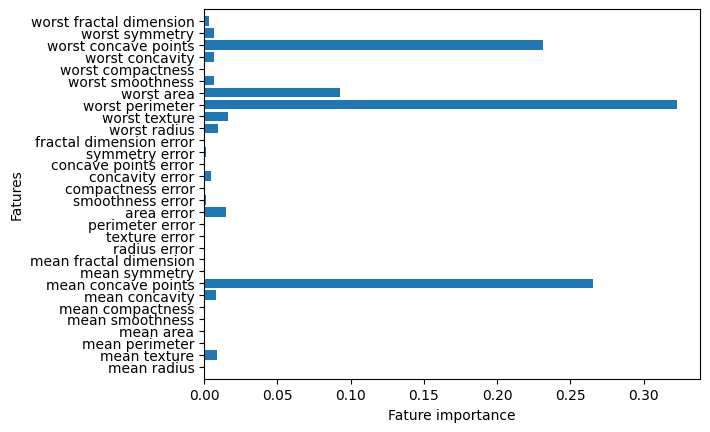

In [68]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

**장단점과 매개변수**   
* 매개변수 조정이 중요하며 훈련 시간이 길다.
* 다른 트리 기반 모델의 장단점과 동일
* 이진 특성이나 연속적인 특성에서도 잘 동작
* 중요 매개변수: ```n_estimators```, ```learning_rate```
* 랜덤 포레스트와는 달리 ```n_estimators```를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아진다.
* 조기 종료를 위한 매개변수: ```n_iter_no_change```, ```validation_fraction```
    * ```validation_fraction``` 만큼 검증 데이터로 사용하여 ```n_iter_no_change``` 반복 동안 검증 점수가 향상되지 않으면 훈련이 종료
* ```max_depth```를 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 함.

#### 2.3.7 배깅, 엑스트라 트리, 에이다부스트 (그 외 다른 앙상블)

In [69]:
# 예시 데이터
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [70]:
# Bagging(Bootstrap aggregating)
# 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42) # OOB: 부트스트래핑에 포함되지 않은 샘플
bagging.fit(Xc_train, yc_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, n_jobs=-1,
                  oob_score=True, random_state=42)

In [71]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.944
OOB 샘플의 정확도: 0.944


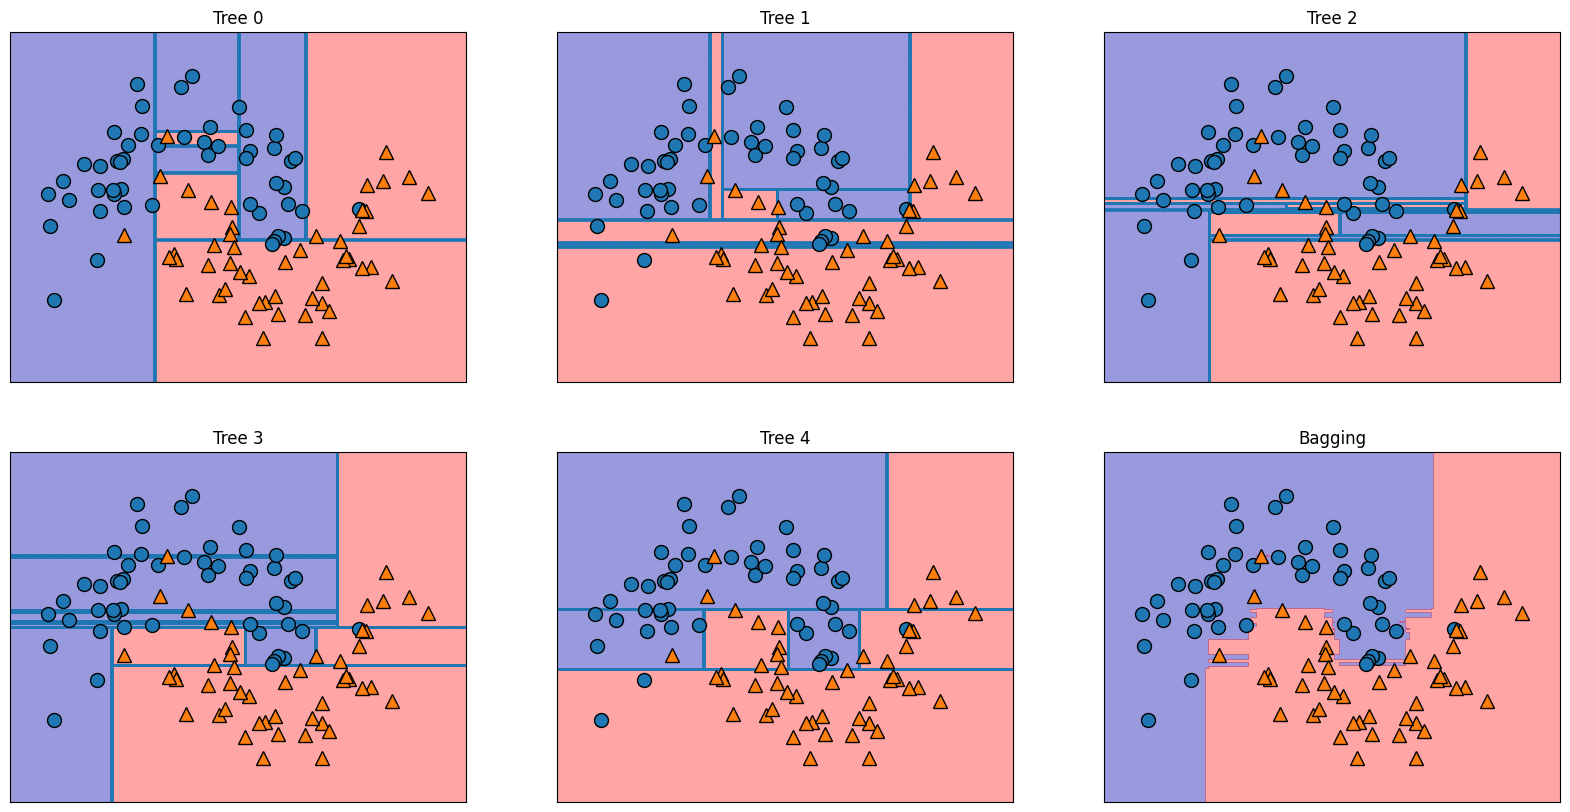

In [72]:
# 결정 트리에 직접 배깅을 적용 (랜덤 포레스트가 하는 일을 직접 수행)
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

# 결정경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i , (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [73]:
# cancer dataset
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, random_state=42)
bagging.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


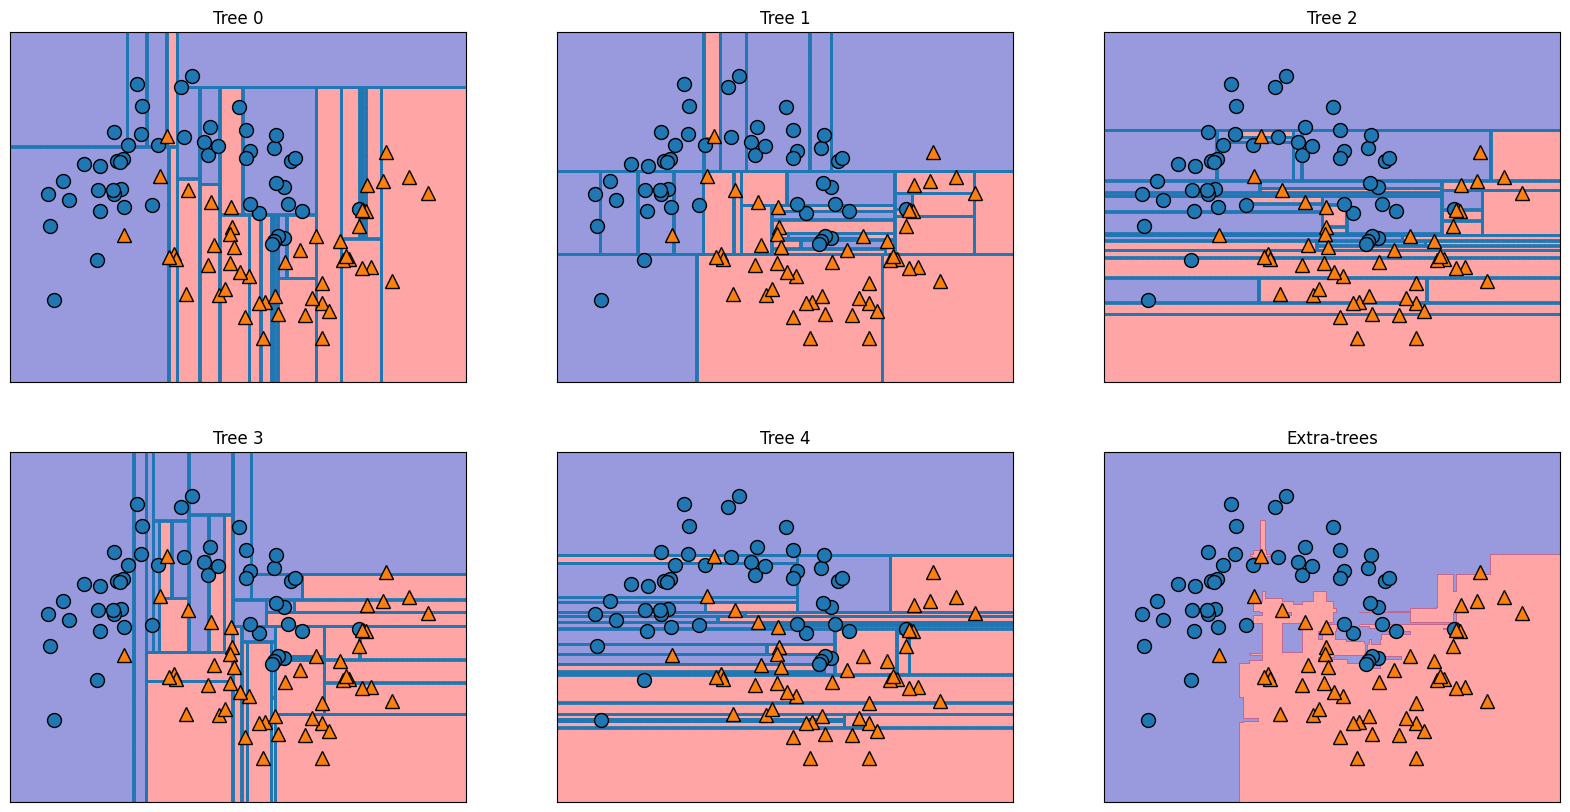

In [74]:
# 엑스트라 트리(Extra-trees): DecisionTreeClassfier(splitter='random')을 사용하고 부트스트랩 샘플링 적용(X)
# 랜덤 포레스트는 splitter='best'를 사용
# 엑스트라 트리 결정 경계
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig,axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Extra-trees")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [75]:
# cancer dataset
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(X_train, y_train)))
print("테스트 세트 정확도 {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도 0.972


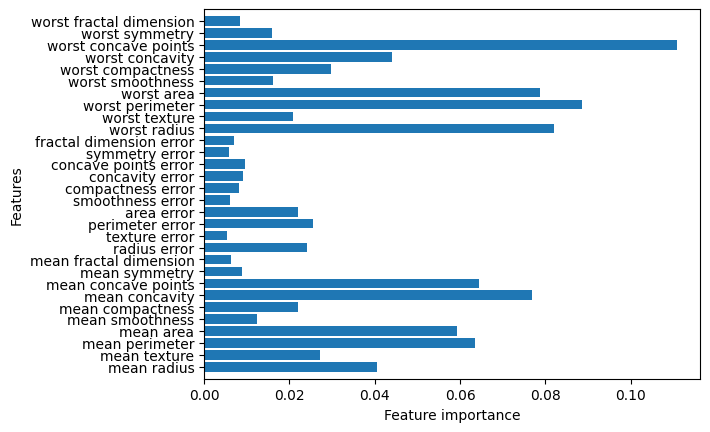

In [76]:
# 특성 중요도
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

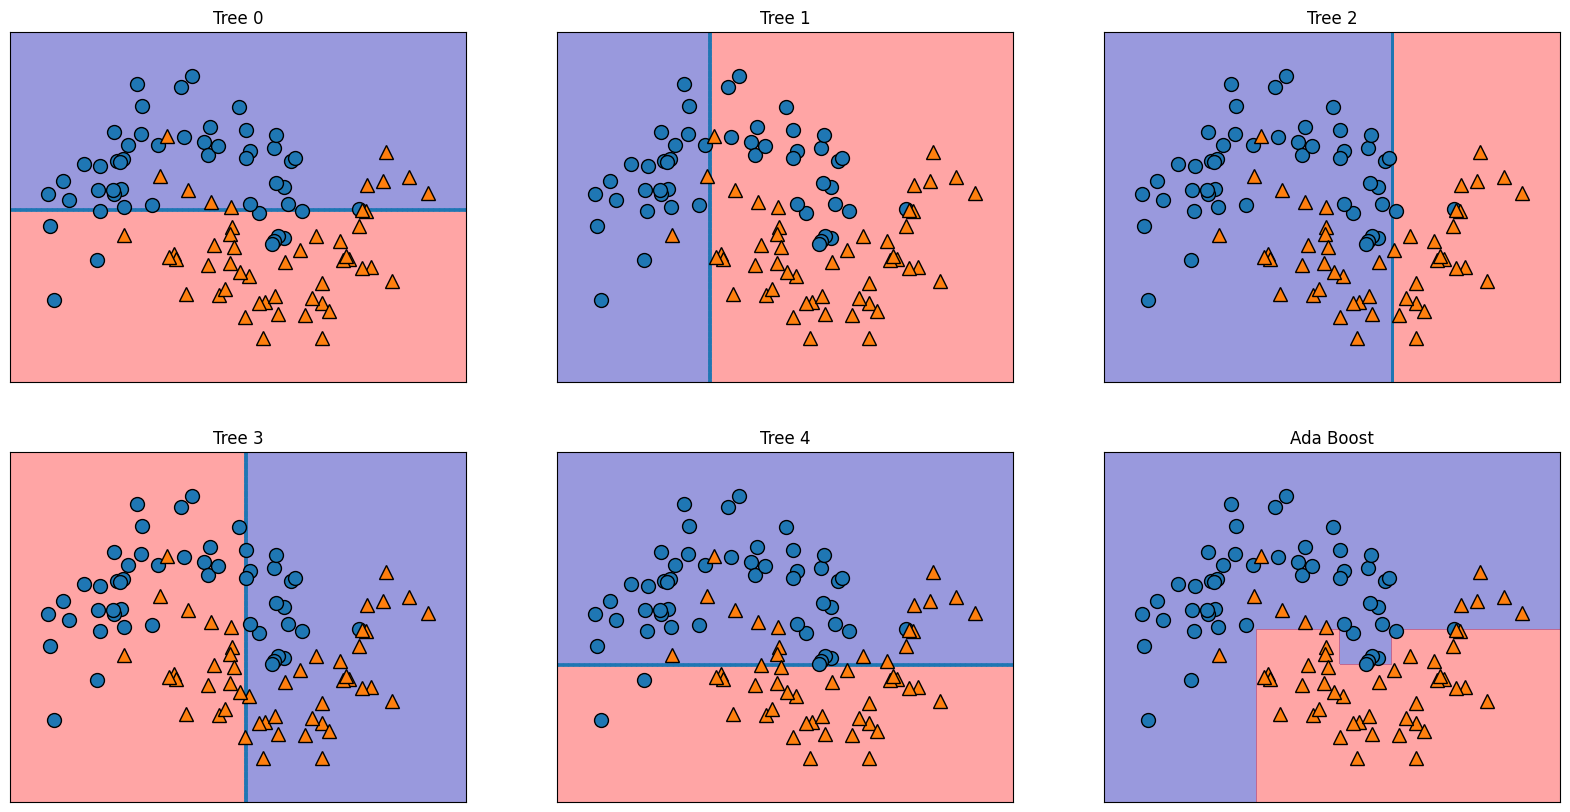

In [77]:
# 에이다부스트(Adaptive Boosting): 그레이디언트 부스팅과 비슷하지만 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련
# 그레이디언트 부스트와 같이 약한 학습기(얕은 트리)를 사용
# two moons dataset 결정경계
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5, random_state=42)   # max_depth=1
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Ada Boost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [78]:
# cancer dataset
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(Xc_test, yc_test)))
# 트리가 얕기 때문에 일반화 성능이 조금 더 좋음

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


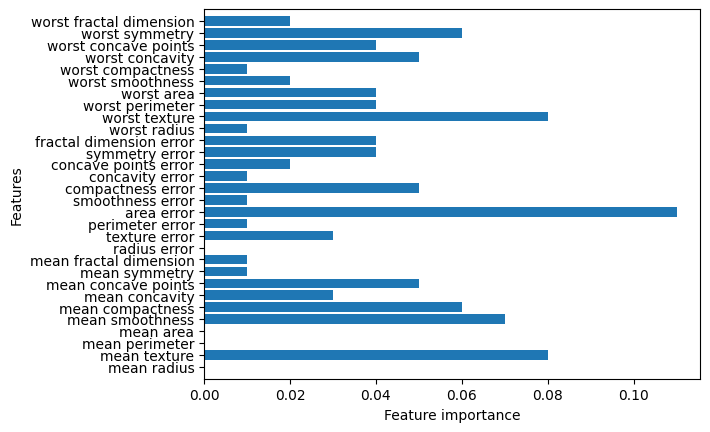

In [79]:
# 특성 중요도
n_features = cancer.data.shape[1]
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

#### 2.3.8 커널 서포트 벡터 머신   
:  입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장   

**선형 모델과 비선형 특성**   

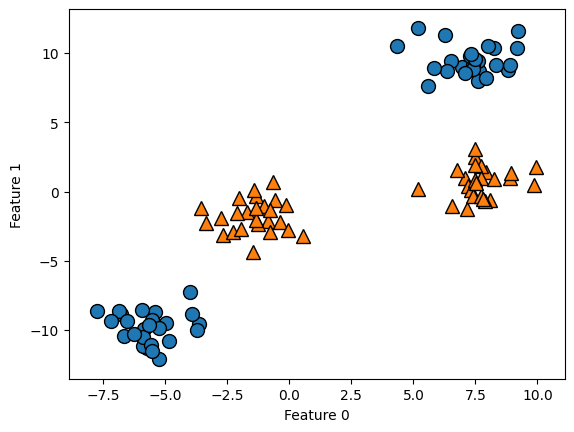

In [80]:
# 예시 데이터셋
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


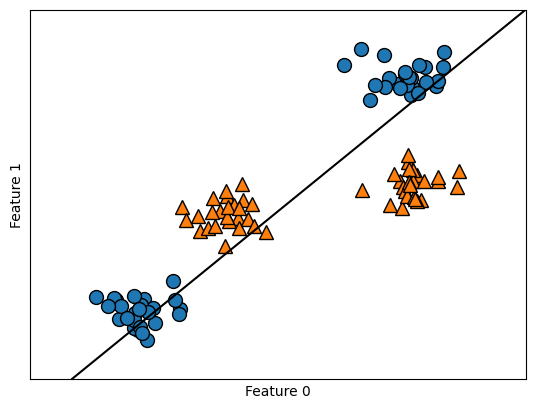

In [81]:
# LinearSVC 적용
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어 이런 데이터셋에는 잘 들어맞지 않는다. -> 특성 추가

C:\Users\supli\AppData\Local\Temp\ipykernel_16896\647831104.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')    # y = 0 인 포인트
C:\Users\supli\AppData\Local\Temp\ipykernel_16896\647831104.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolors='k')    # y = 1 인 포인트


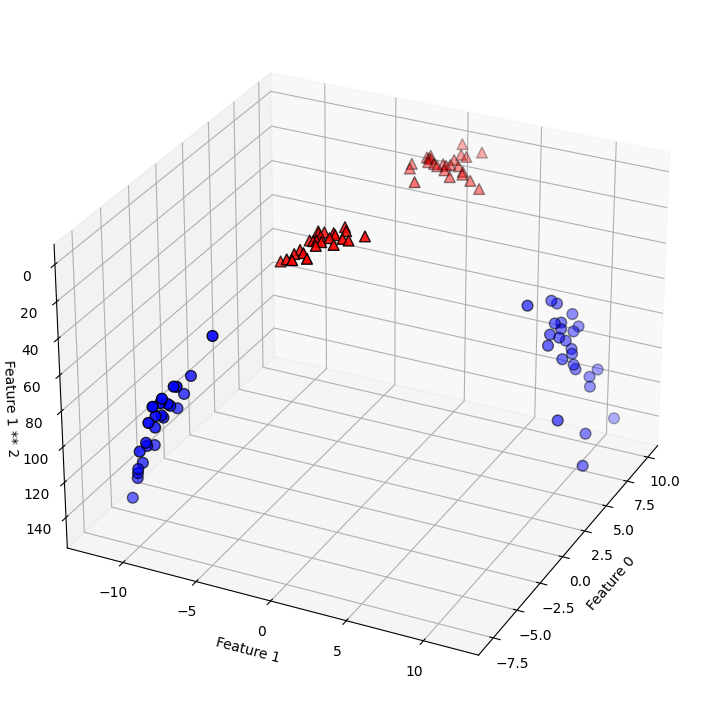

In [82]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib

figure = plt.figure(figsize=(7, 7))
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
mask = (y == 0)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')    # y = 0 인 포인트
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolors='k')    # y = 1 인 포인트
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2", labelpad=0)
plt.show()

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\supli\AppData\Local\Temp\ipykernel_16896\1128745144.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
C:\Users\supli\AppData\Local\Temp\ipykernel_16896\1128745144.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolors='k')


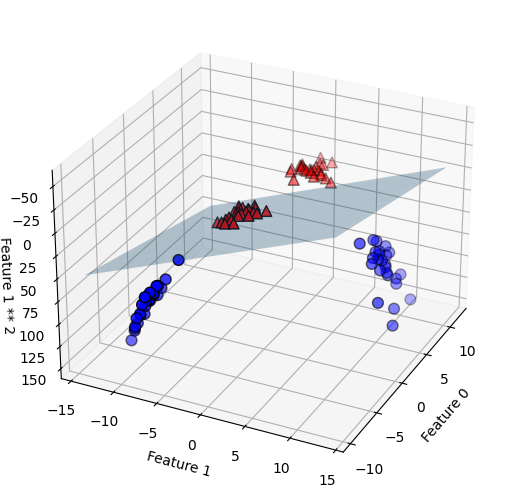

In [83]:
# 확장된 데이터셋에서 선형모델 생성
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolors='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2", labelpad=0)
plt.show()

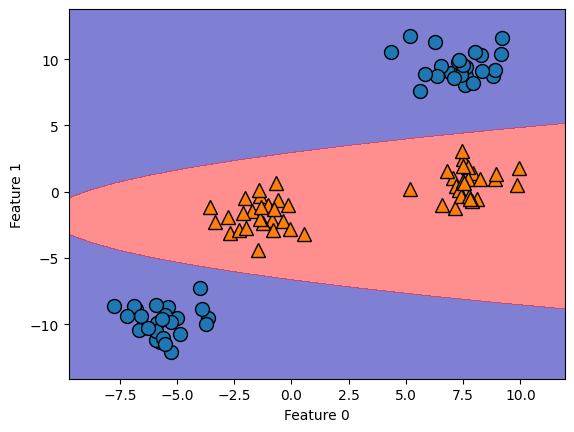

In [84]:
# 3차원에서 생성한 선형 SVM 모델을 두개에 특성에 투영
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

**커널 기법**   
: 수학적 방법을 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시키는 기법   

* 다항식 커널: 특성의 가능한 조합을 지정된 차수까지 모두 계산 (Ex, ```Feature0 ** 2 X Feature1 ** 5```)
* RBF 커널(가우시안 커널): 모든 차수의 모든 다항식을 고려

**SVM 이해하기**   
서포트 벡터: 두 클래스 사이의 경계에 위치한 데이터 포인트   
&emsp; 새로운 데이터 포인트가 주어지면 각 서포트 벡터와의 거리를 측정(가우시안 커널로 계산, $K_{rbf}(x_1, x_2) = exp(-\gamma |x_1 - x_2|^2)$

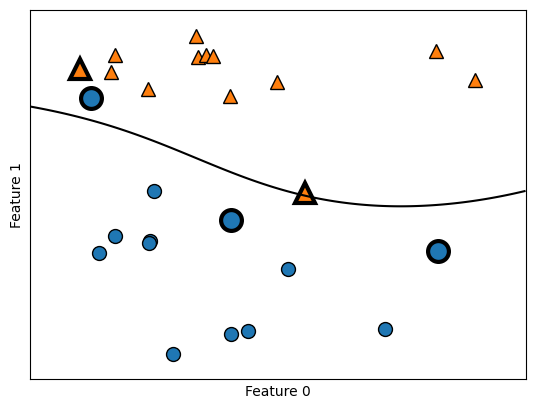

In [85]:
# 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)   # 데이터 포인트
sv = svm.support_vectors_   # 서포트 벡터
sv_labels = svm.dual_coef_.ravel() > 0  # dual_coef_의 부호에 따라 서포트 벡터의 클래스 결정
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

검은색 실선은 결정 경계, 검은색 테두리 데이터 포인트는 서포트 벡터 이다.

**SVM 매개변수 튜닝**   
```gamma``` 매개변수는 $\gamma$: 가우시안 커널 폭의 역수   
&emsp;값이 작으면 영향을 미치는 영역이 넓어지고, 반대로 값이 커지면 영역이 제한적이다.   
```C``` 매개변수는 규제 매개변수, 각 포인트의 중요도를 제한

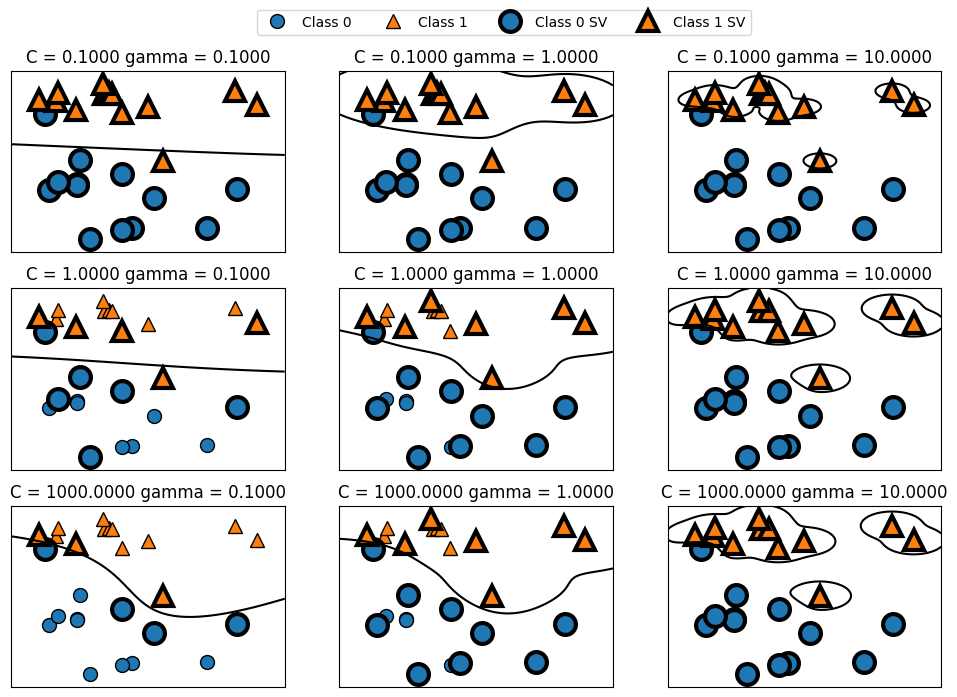

In [86]:
# gamma, C 매개변수 변화에 따른 결과 차이
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SV", "Class 1 SV"], ncol=4, loc=(.9, 1.2))
plt.show()

* ```gamma``` 값이 작을수록 가우시안 커널 반경이 커 결정 경계가 부드럽고, 값이 커질수록 결정 경계는 하나의 포인트에 민감해짐.
* ```C``` 값이 작을수록 제약이 커 각 데이터 포인트의 영향력이 작음.

In [87]:
# RBF 커널 SVM을 유방암 데이터셋에 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC() # C=1, gamma=1/n_featues
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))
# 과소 적합

훈련 세트 정확도: 0.904
테스트 세트 정확도: 0.937


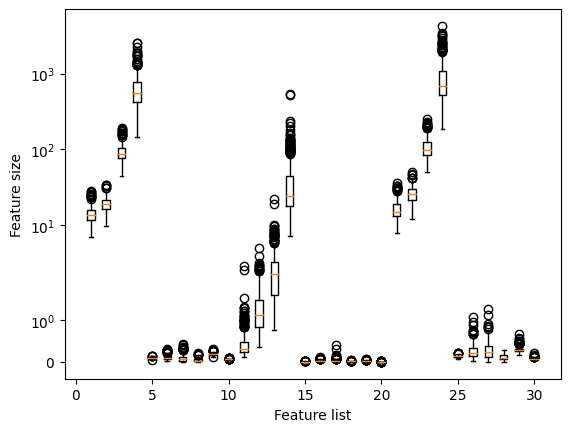

In [88]:
# 각 특성의 최솟값과 최댓값을 로그 스케일로 표현
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")
plt.show()

**SVN을 위한 데이터 전처리**   
위의 그래프를 보면 알다시피 각 특성의 크기가 들쑥날쑥하다. -> 특성 값의 범위가 비슷해지도록 조정: 데이터 전처리

In [89]:
min_on_training = X_train.min(axis=0)   # 훈련 세트에서 특성별 최솟값
range_on_training = (X_train - min_on_training).max(axis=0) # 훈련 세트에서 특성별 범위

# 훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1이 됨.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [90]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정학도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))
# 특성 범위를 조정하니 과소적합이 많이 해소된 것을 볼 수 있다.

훈련 세트 정학도: 0.984
테스트 세트 정확도: 0.972


In [91]:
# C, gamma 조정
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정학도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정학도: 0.988
테스트 세트 정확도: 0.979


**장단점과 매개변수**   
* 특성이 몇 개 안되더라도 새로운 특성을 만들어 복잡한 결정 경계를 생성할 수 있다.
* 샘플이 많을 때는 잘 맞지 않는다. (속도 문제)
* 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다.
* 모델 분석이 어렵다. 
* ```C```, ```gamma```: 모델의 복잡도 조정, 둘 다 큰 값일수록 복잡한 모델을 생성

#### 2.3.9 신경망(딥러닝)   

**신경망 모델**
: 다충 퍼셉트론(Multilayer perceptrons, MLP)은 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이다.   

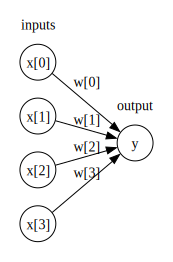

In [93]:
# 선형 회귀 모델을 퍼셉트론으로 표현
display(mglearn.plots.plot_logistic_regression_graph())

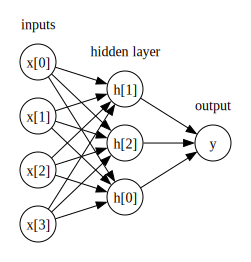

In [94]:
# 은닉층이 하나인 다층 퍼셉트론
display(mglearn.plots.plot_single_hidden_layer_graph())

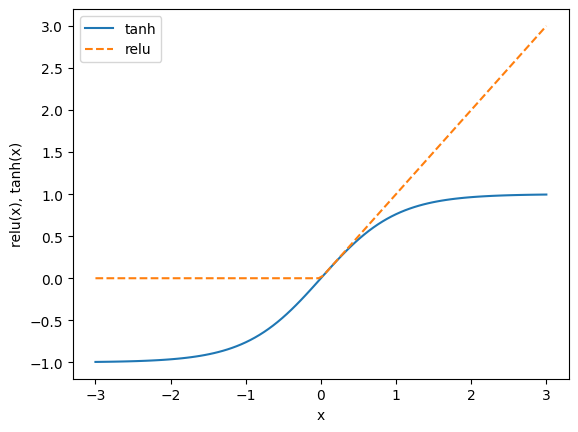

In [95]:
# 활성화 함수의 예시: ReLU, tanh
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel("relu(x), tanh(x)")
plt.show()

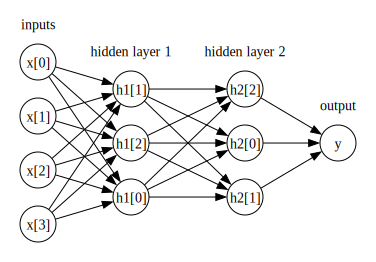

In [96]:
# 은닉층이 2개인 다층 퍼셉트론
display(mglearn.plots.plot_two_hidden_layer_graph())

**신경망 튜닝**

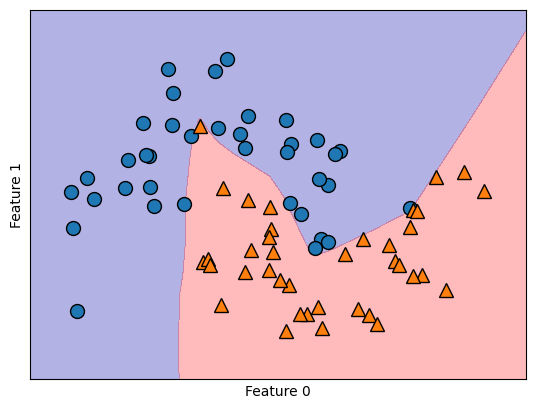

In [98]:
# 100개의 은닉유닛(1층) 신경망으로 학습시킨 결정 경계
from sklearn.neural_network import MLPClassifier    # 다층 퍼셉트론
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

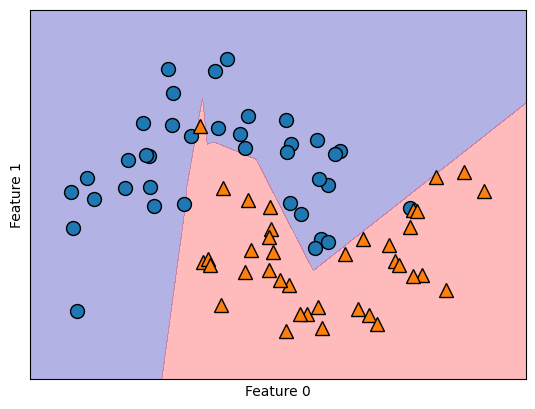

In [99]:
# 10개의 은닉유닛(1층) 신경망으로 학습시킨 결정 경계
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

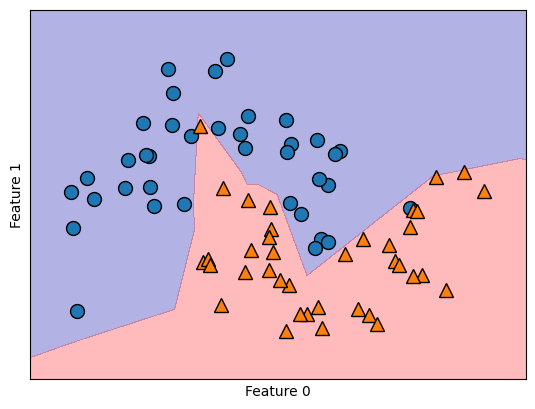

In [100]:
# 은닉층: 2, 은닉유닛: 10
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

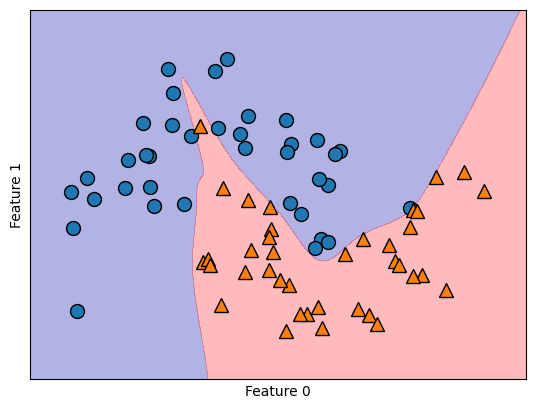

In [102]:
# 은닉층: 2, 은닉유닛: 10, 활성화 함수: tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

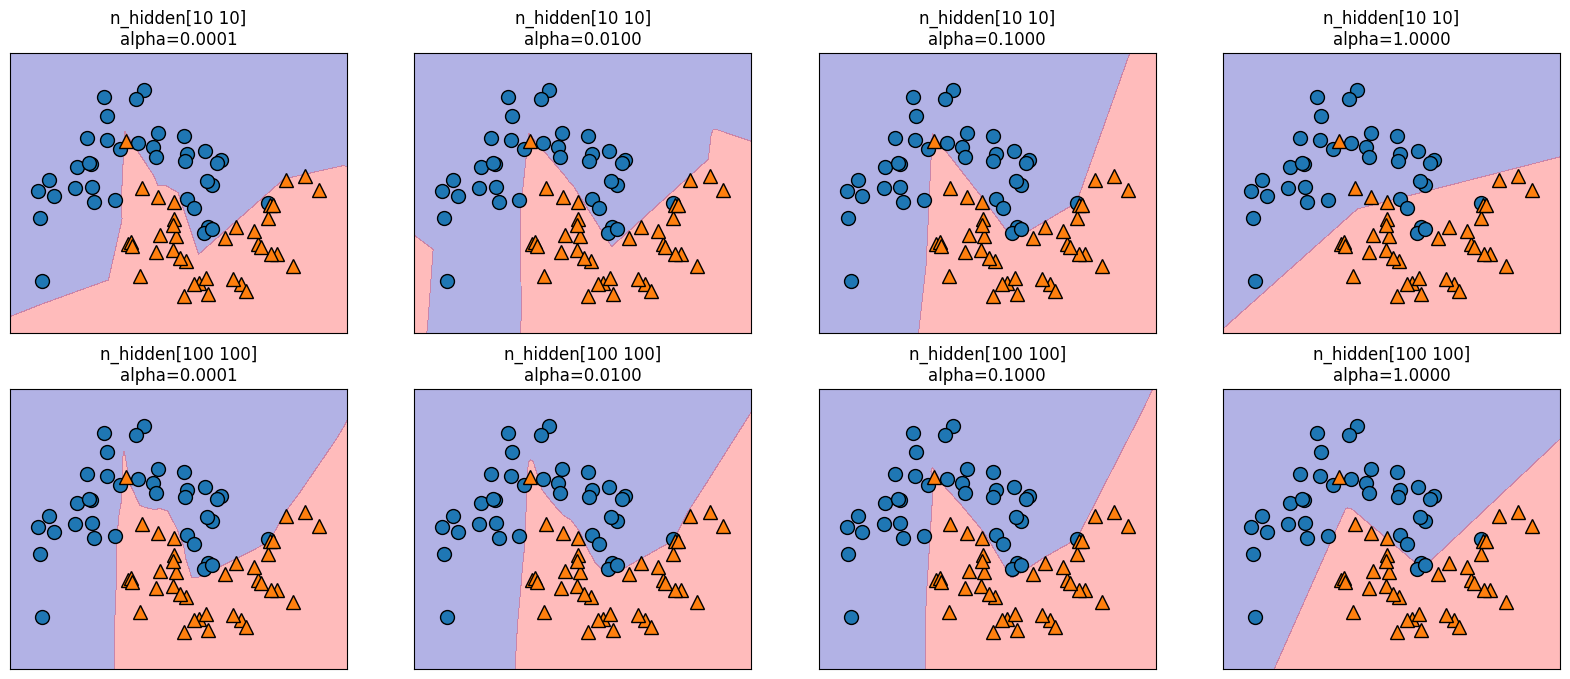

In [103]:
# alpha 규제에 따른 결정 경계
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden[{} {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

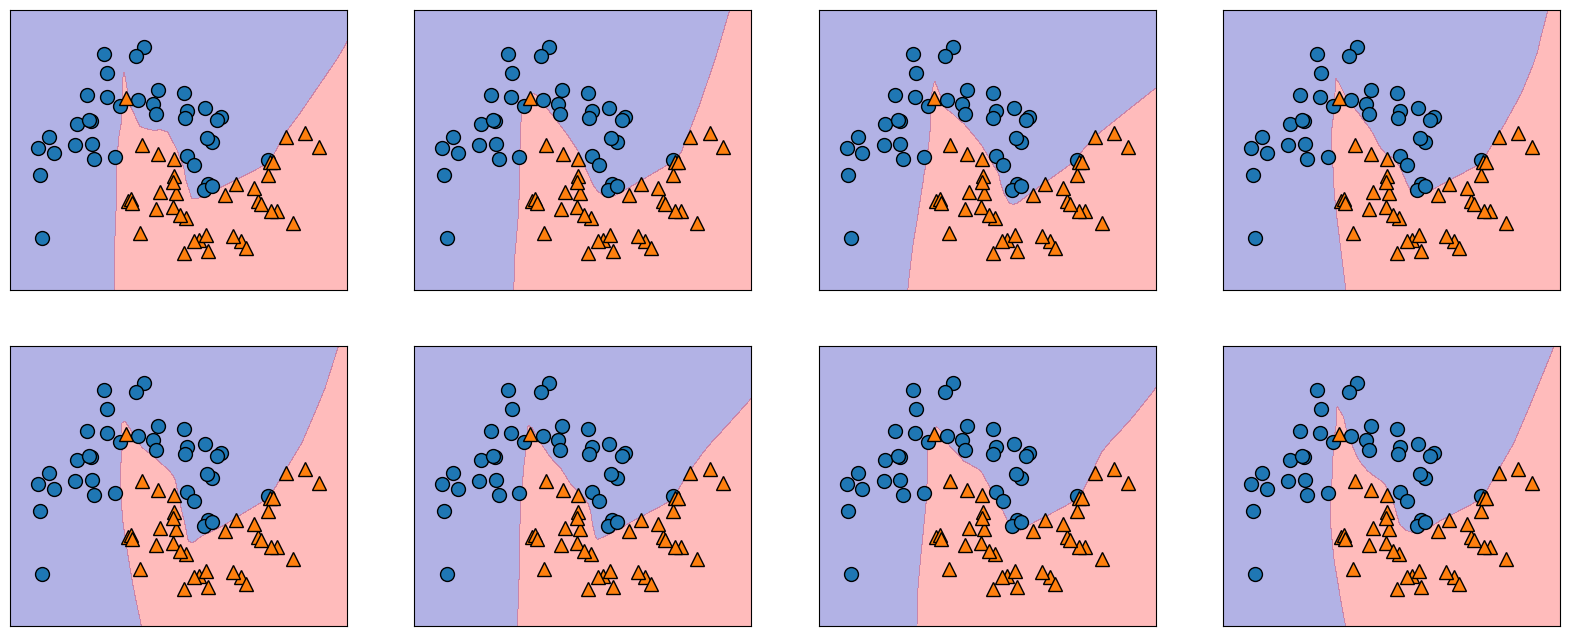

In [104]:
# 같은 매개변수를 가졌지만 초기화를 다르게 한 모델들
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
plt.show()

In [106]:
#  유방암 데이터셋에 MLPClassifier 적용
print("유방암 데이터의 특성별 최댓값: \n", cancer.data.max(axis=0))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

유방암 데이터의 특성별 최댓값: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [115]:
# 데이터 스케일 정규화
mean_on_train = X_train.mean(axis=0)    # 훈련 세트 각 특성의 평균 계산
std_on_train = X_train.std(axis=0)      # 훈련 세트 각 특성의 표준편차 계산

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0)  # 반복 횟수 증가
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [114]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)  # alpha 값을 늘려 규제를 강화
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


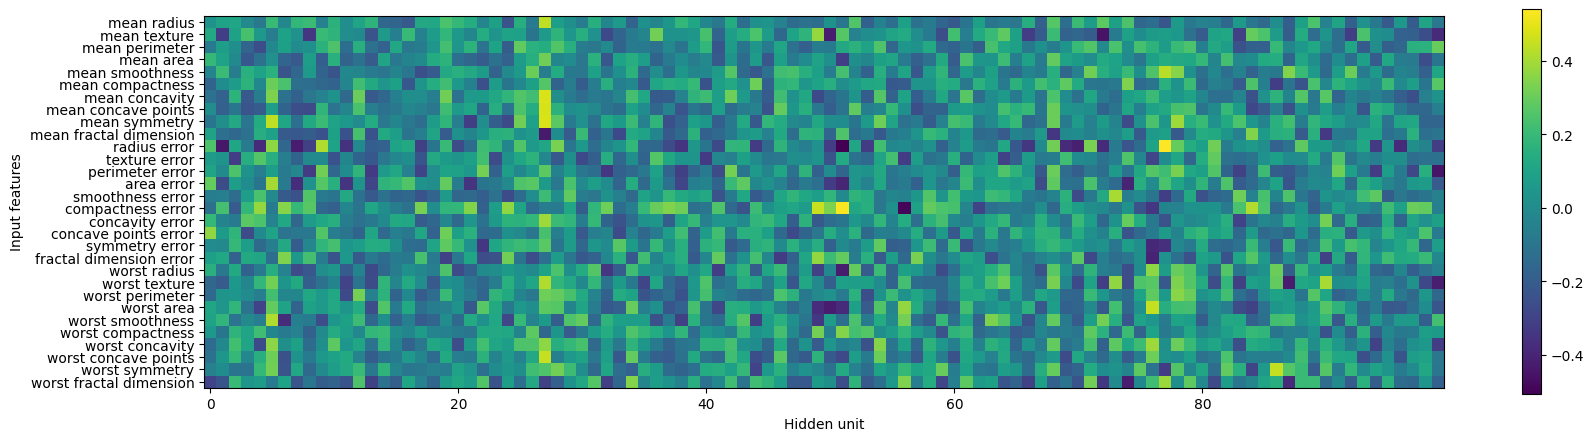

In [121]:
# 유방암 데이터셋으로 학습시킨 신경망의 첫번째 층 가중치 히트맵
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Hidden unit")
plt.ylabel("Input features")
plt.colorbar()
plt.show()
# 작은 가중치를 가진 특성은 모델에 덜 중요하다.

**장단점과 매개변수**
* 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다.
* 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 낸다.
* 학습이 오래 걸린다.
* 데이터 전처리에 주의


**신경망의 복잡도 추정**   
* 먼저 청분히 과대적홥될만큼 큰 모델을 생성(데이터 양, 은닉층 개수)
* 그런 다음 신경망 구조를 줄이거나 ```alpha```값을 증가시켜 일반화
* ```solver``` 매개변수: 가중치 학습에 사용되는 알고리즘: ```adam```(데이터 스케일 중요), ```lbfgs```(시간이 오래 걸릴 수 있음), ```sgd```

### 2.4 분류 예측의 불확실성 추정